In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import pandas as pd
customer_data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/shopping-data.csv')
customer_data.shape
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


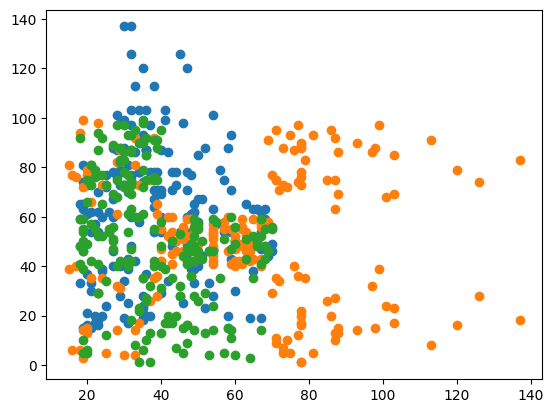

In [42]:
data = customer_data.iloc[:, 2:5].values

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

plt.scatter(data[:,0],data[:,1], label='True Position')
plt.scatter(data[:,1],data[:,2], label='True Position')
plt.scatter(data[:,0],data[:,2], label='True Position')

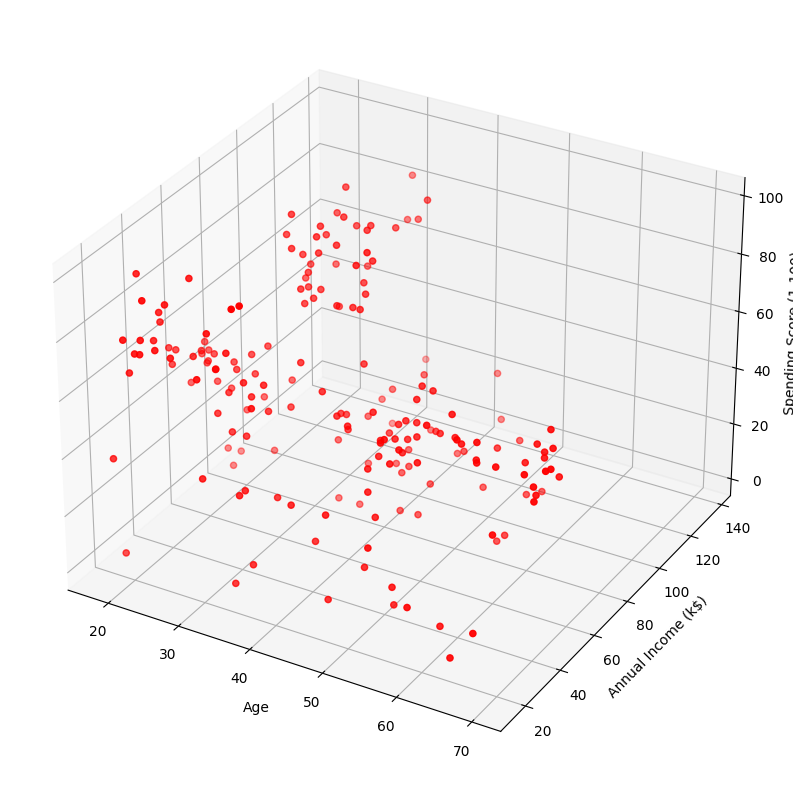

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', marker='o')

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

[[46.16521739 59.36521739 32.88695652]
 [28.95294118 62.17647059 73.62352941]]
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 0, 'Spending Score (1-100)')

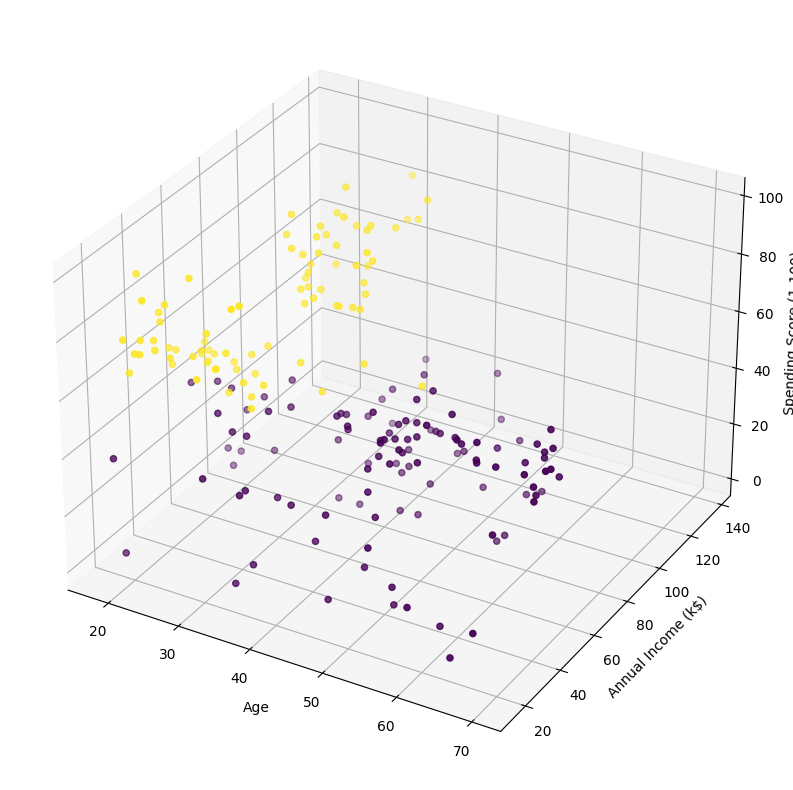

In [44]:
kmeans= KMeans(n_clusters=2)
kmeans.fit(data)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=kmeans.labels_, marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

In [47]:
from statistics import mean

for i in range(0, 2):

  minV0 = min(customer_data[kmeans.labels_== i]['Age'])
  maxV0 = max(customer_data[kmeans.labels_== i]['Age'])
  avgV0 = mean(customer_data[kmeans.labels_==i]['Age'])

  minV1 = min(customer_data[kmeans.labels_== i]['Annual Income (k$)'])
  maxV1 = max(customer_data[kmeans.labels_== i]['Annual Income (k$)'])
  avgV1 = mean(customer_data[kmeans.labels_==i]['Annual Income (k$)'])

  minV2 = min(customer_data[kmeans.labels_== i]['Spending Score (1-100)'])
  maxV2 = max(customer_data[kmeans.labels_== i]['Spending Score (1-100)'])
  avgV2 = mean(customer_data[kmeans.labels_==i]['Spending Score (1-100)'])

  print(">>> Group", i)
  print("Age (min, max, avg): min =", '%.2f' % minV0, "/ max =", '%.2f' % maxV0, "/ avg =", '%.2f' % avgV0)
  print("Annual (min, max, avg): min =", '%.2f' % minV1, "/ max =", '%.2f' % maxV1, "/ avg =", '%.2f' % avgV1)
  print("Spending Score (min, max, avg): min =", '%.2f' % minV2, "/ max =", '%.2f' % maxV2, "/ avg =", '%.2f' % avgV2)

>>> Group 0
Age (min, max, avg): min = 18.00 / max = 70.00 / avg = 46.17
Annual (min, max, avg): min = 15.00 / max = 137.00 / avg = 59.37
Spending Score (min, max, avg): min = 1.00 / max = 60.00 / avg = 32.89
>>> Group 1
Age (min, max, avg): min = 18.00 / max = 49.00 / avg = 28.95
Annual (min, max, avg): min = 15.00 / max = 137.00 / avg = 62.18
Spending Score (min, max, avg): min = 46.00 / max = 99.00 / avg = 73.62
